In [1]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
df = pd.read_excel("Fertility Rate Per Woman and Female Education Relationship Data 2013.xlsx")
df.head(15)

,Country Name,"Fertility rate, total (births per woman) 2013","Mean years of schooling, female (years) 2013",GDP per capita (current US$) 2013
0,Afghanistan,5.359,1.4,637.165523
1,Albania,1.690,9.8,4413.060861
2,Algeria,2.990,6.0,5499.581487
3,Argentina,2.322,10.5,13080.254732
4,Armenia,1.728,11.5,3838.185801
5,Australia,1.855,12.2,68150.107041
6,Austria,1.440,11.5,50716.708706
7,Azerbaijan,1.980,10.2,7875.756953
8,"Bahamas, The",1.810,11.5,28768.029894
9,Bahrain,2.098,8.9,24744.296959


In [4]:
df  # Check data frame.

,Country Name,"Fertility rate, total (births per woman) 2013","Mean years of schooling, female (years) 2013",GDP per capita (current US$) 2013
0,Afghanistan,5.359,1.4,637.165523
1,Albania,1.690,9.8,4413.060861
2,Algeria,2.990,6.0,5499.581487
3,Argentina,2.322,10.5,13080.254732
4,Armenia,1.728,11.5,3838.185801
...,...,...,...,...
163,Vietnam,1.978,7.5,1886.671896
164,"Yemen, Rep.",4.326,1.7,1607.152365
165,Zambia,5.132,6.2,1878.907001
166,Zimbabwe,4.030,7.3,1430.000818


In [5]:
mean_df = df.mean()
print(mean_df)

Fertility rate, total (births per woman) 2013        2.789872
Mean years of schooling, female (years) 2013         7.998810
GDP per capita (current US$) 2013                14962.667247
dtype: float64


In [6]:
df['GDP per capita (current US$) 2013']

0        637.165523
1       4413.060861
2       5499.581487
3      13080.254732
4       3838.185801
           ...     
163     1886.671896
164     1607.152365
165     1878.907001
166     1430.000818
167    21973.000000
Name: GDP per capita (current US$) 2013, Length: 168, dtype: float64

In [7]:
log_gdp = np.log(df['GDP per capita (current US$) 2013'])  # log(GDP per capita (current US$) 2013)

In [8]:
log_gdp

0      6.457029
1      8.392324
2      8.612427
3      9.478859
4      8.252755
         ...   
163    7.542570
164    7.382219
165    7.538446
166    7.265430
167    9.997570
Name: GDP per capita (current US$) 2013, Length: 168, dtype: float64

In [9]:
df.insert(4, column="log(GDP)", value=log_gdp)  # New colomn of log(GDP)

In [10]:
df

,Country Name,"Fertility rate, total (births per woman) 2013","Mean years of schooling, female (years) 2013",GDP per capita (current US$) 2013,log(GDP)
0,Afghanistan,5.359,1.4,637.165523,6.457029
1,Albania,1.690,9.8,4413.060861,8.392324
2,Algeria,2.990,6.0,5499.581487,8.612427
3,Argentina,2.322,10.5,13080.254732,9.478859
4,Armenia,1.728,11.5,3838.185801,8.252755
...,...,...,...,...,...
163,Vietnam,1.978,7.5,1886.671896,7.542570
164,"Yemen, Rep.",4.326,1.7,1607.152365,7.382219
165,Zambia,5.132,6.2,1878.907001,7.538446
166,Zimbabwe,4.030,7.3,1430.000818,7.265430


In [11]:
print(df['Fertility rate, total (births per woman) 2013'])

0      5.359
1      1.690
2      2.990
3      2.322
4      1.728
       ...  
163    1.978
164    4.326
165    5.132
166    4.030
167    1.070
Name: Fertility rate, total (births per woman) 2013, Length: 168, dtype: float64


In [12]:
print(df['GDP per capita (current US$) 2013'])

0        637.165523
1       4413.060861
2       5499.581487
3      13080.254732
4       3838.185801
           ...     
163     1886.671896
164     1607.152365
165     1878.907001
166     1430.000818
167    21973.000000
Name: GDP per capita (current US$) 2013, Length: 168, dtype: float64


In [13]:
# Visualization 1
# Create a plot of GDP per capita (current US$) and Fertility rate, total (births per woman).

In [14]:
X = df['GDP per capita (current US$) 2013']
y = df['Fertility rate, total (births per woman) 2013']

In [15]:
length = len(df['Country Name'])

In [16]:
country_name = df['Country Name']

In [17]:
annotations=df['Country Name']

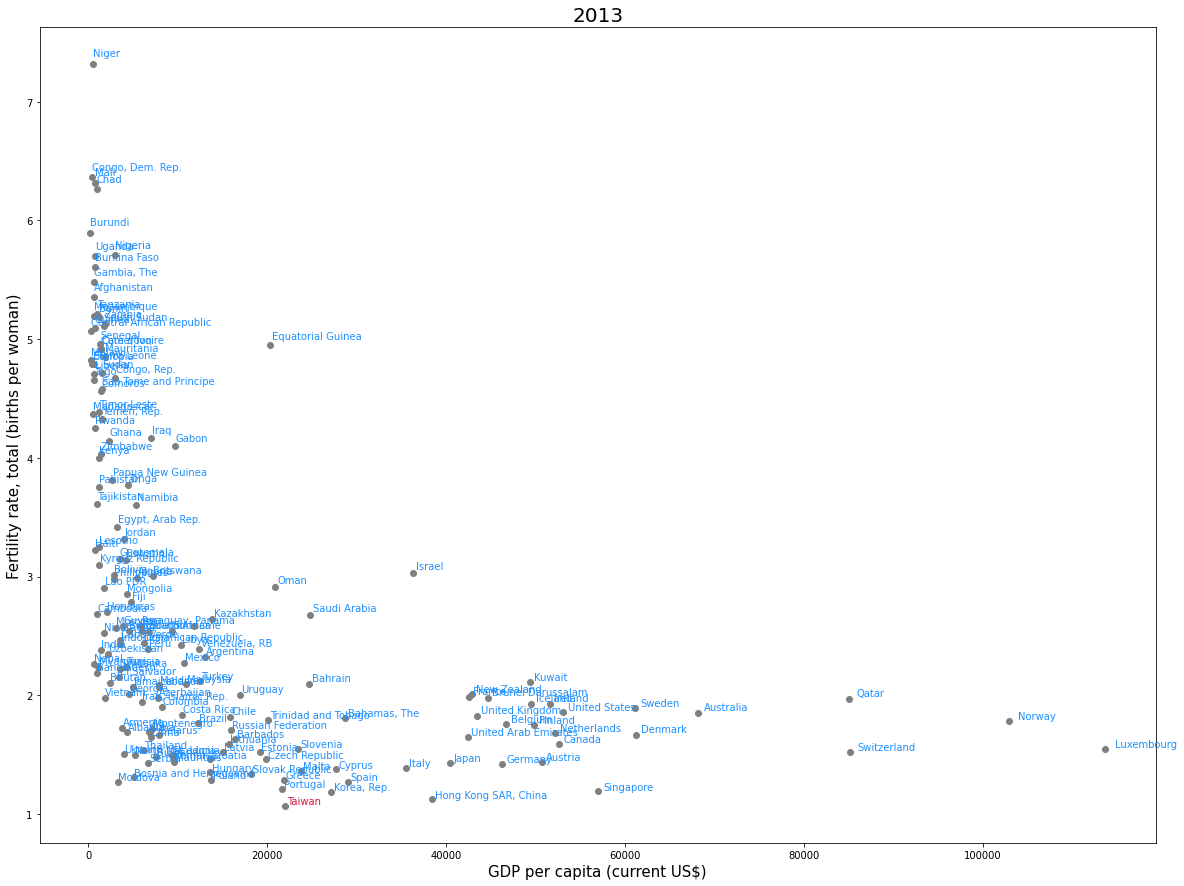

In [18]:
# Visualization of GDP per capita (current US$) and Fertility rate, total (births per woman).
plt.figure(figsize = (20, 15))

plt.scatter(X, y, color="gray")
plt.title("2013", fontsize=20)
plt.xlabel("GDP per capita (current US$)", fontsize=15)
plt.ylabel("Fertility rate, total (births per woman)", fontsize=15)

# Add country name tag.
for i, label in enumerate(annotations):
    if country_name[i] == "Taiwan":
        plt.annotate(label, (X[i], y[i]), xytext=(1.01*X[i], 1.01*y[i]), color="crimson")
    else:
        plt.annotate(label, (X[i], y[i]), xytext=(1.01*X[i], 1.01*y[i]), color="dodgerblue")
plt.savefig('1.png', dpi=600)

# # Add country name tag.
# for i in range(length):
#     if country_name[i] == "Taiwan":
#         plt.text(X[i], y[i]*1.02, country_name[i], fontsize=10, color = "crimson", style = "italic", weight = "light", verticalalignment='center', horizontalalignment='right',rotation=0)
#     else:
#         plt.text(X[i], y[i]*1.02, country_name[i], fontsize=10, color = "dodgerblue", style = "italic", weight = "light", verticalalignment='center', horizontalalignment='right',rotation=0)

plt.show()

In [19]:
# Visualization 2
# Create a plot of log(GDP per capita (current US$)) and Fertility rate, total (births per woman).

In [20]:
X = df['log(GDP)']
y = df['Fertility rate, total (births per woman) 2013']

In [21]:
length = len(df['Country Name'])

In [22]:
country_name = df['Country Name']

In [23]:
annotations=df['Country Name']

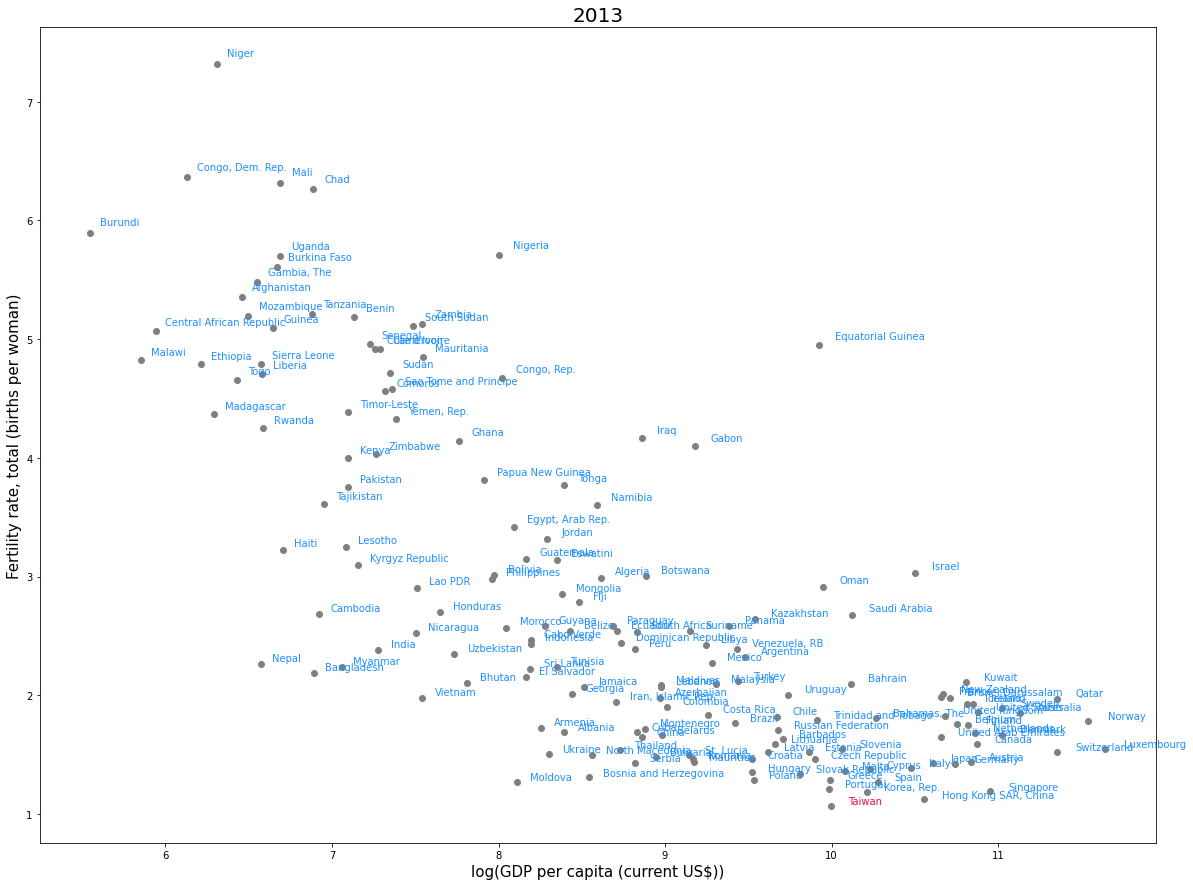

In [24]:
# Visualization of log(GDP per capita (current US$)) and Fertility rate, total (births per woman).
plt.figure(figsize = (20, 15))

plt.scatter(X, y, color="gray")
plt.title("2013", fontsize=20)
plt.xlabel("log(GDP per capita (current US$))", fontsize=15)
plt.ylabel("Fertility rate, total (births per woman)", fontsize=15)

# Add country name tag.
for i, label in enumerate(annotations):
    if country_name[i] == "Taiwan":
        plt.annotate(label, (X[i], y[i]), xytext=(1.01*X[i], 1.01*y[i]), color="crimson")
    else:
        plt.annotate(label, (X[i], y[i]), xytext=(1.01*X[i], 1.01*y[i]), color="dodgerblue")
plt.savefig('2.png', dpi=600)

# # Add country name tag.
# for i in range(length):
#     if country_name[i] == "Taiwan":
#         plt.text(X[i], y[i]*1.02, country_name[i], fontsize=10, color = "red", style = "italic", weight = "light", verticalalignment='center', horizontalalignment='right',rotation=0)
#     else:
#         plt.text(X[i], y[i]*1.02, country_name[i], fontsize=10, color = "blue", style = "italic", weight = "light", verticalalignment='center', horizontalalignment='right',rotation=0)

plt.show()

In [25]:
# Visualization 3
# Create a plot of Mean years of schooling (male) and Fertility rate, total (births per woman).

In [26]:
X = df['Mean years of schooling, female (years) 2013']
y = df['Fertility rate, total (births per woman) 2013']

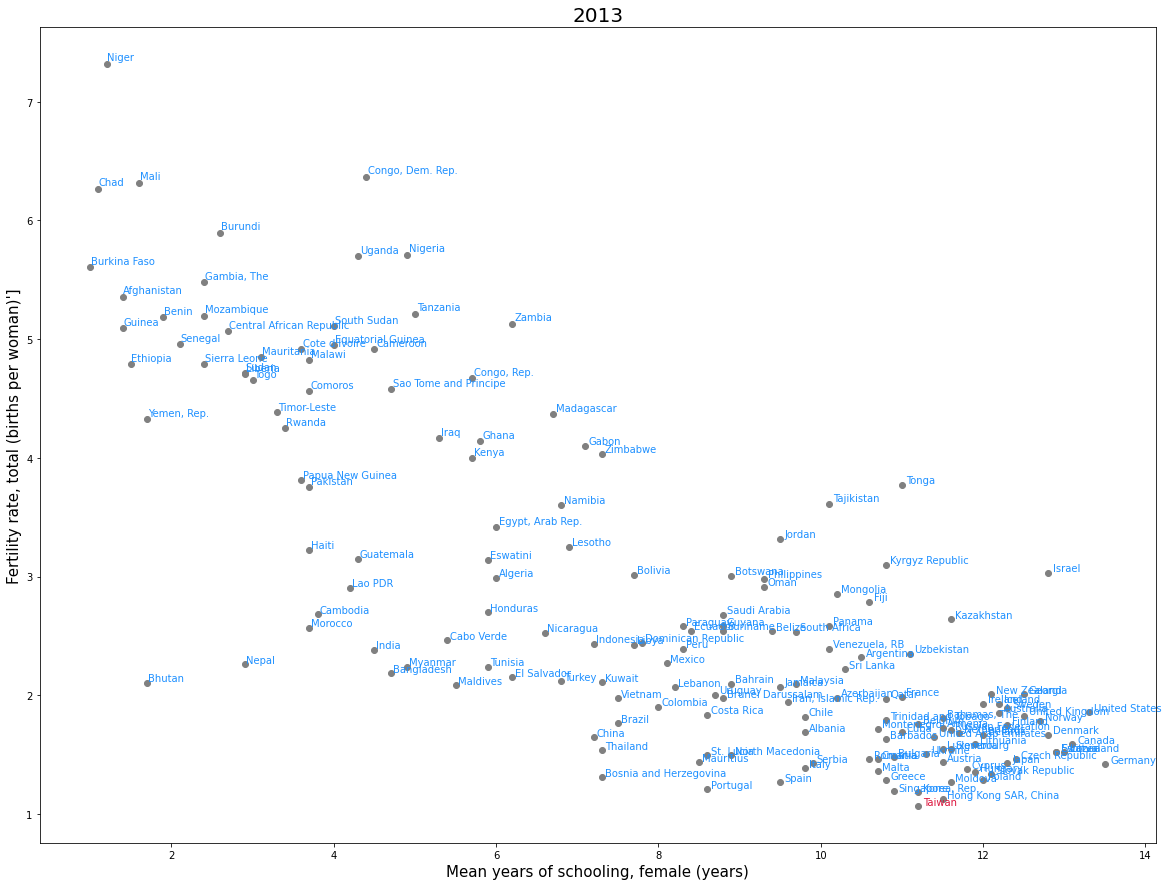

In [27]:
# Visualization of GDP per capita (current US$) and Fertility rate, total (births per woman).
plt.figure(figsize = (20, 15))

plt.scatter(X, y, color="gray")
plt.title("2013", fontsize=20)
plt.xlabel("Mean years of schooling, female (years)", fontsize=15)
plt.ylabel("Fertility rate, total (births per woman)']", fontsize=15)

# Add country name tag.
for i, label in enumerate(annotations):
    if country_name[i] == "Taiwan":
        plt.annotate(label, (X[i], y[i]), xytext=(1.005*X[i], 1.005*y[i]), color="crimson")
    else:
        plt.annotate(label, (X[i], y[i]), xytext=(1.005*X[i], 1.005*y[i]), color="dodgerblue")
plt.savefig('4.png', dpi=600)

# # Add country name tag.
# for i in range(length):
#     if country_name[i] == "Taiwan":
#         plt.text(X[i], y[i]*1.02, country_name[i], fontsize=10, color = "blue", style = "italic", weight = "light", verticalalignment='center', horizontalalignment='right',rotation=0)
#     else:
#         plt.text(X[i], y[i]*1.02, country_name[i], fontsize=10, color = "red", style = "italic", weight = "light", verticalalignment='center', horizontalalignment='right',rotation=0)

plt.show()

In [28]:
# Visualization 4
# Create a plot of Mean years of schooling (female) and Fertility rate, total (births per woman).

In [29]:
X = df['log(GDP)']
y = df['Mean years of schooling, female (years) 2013']

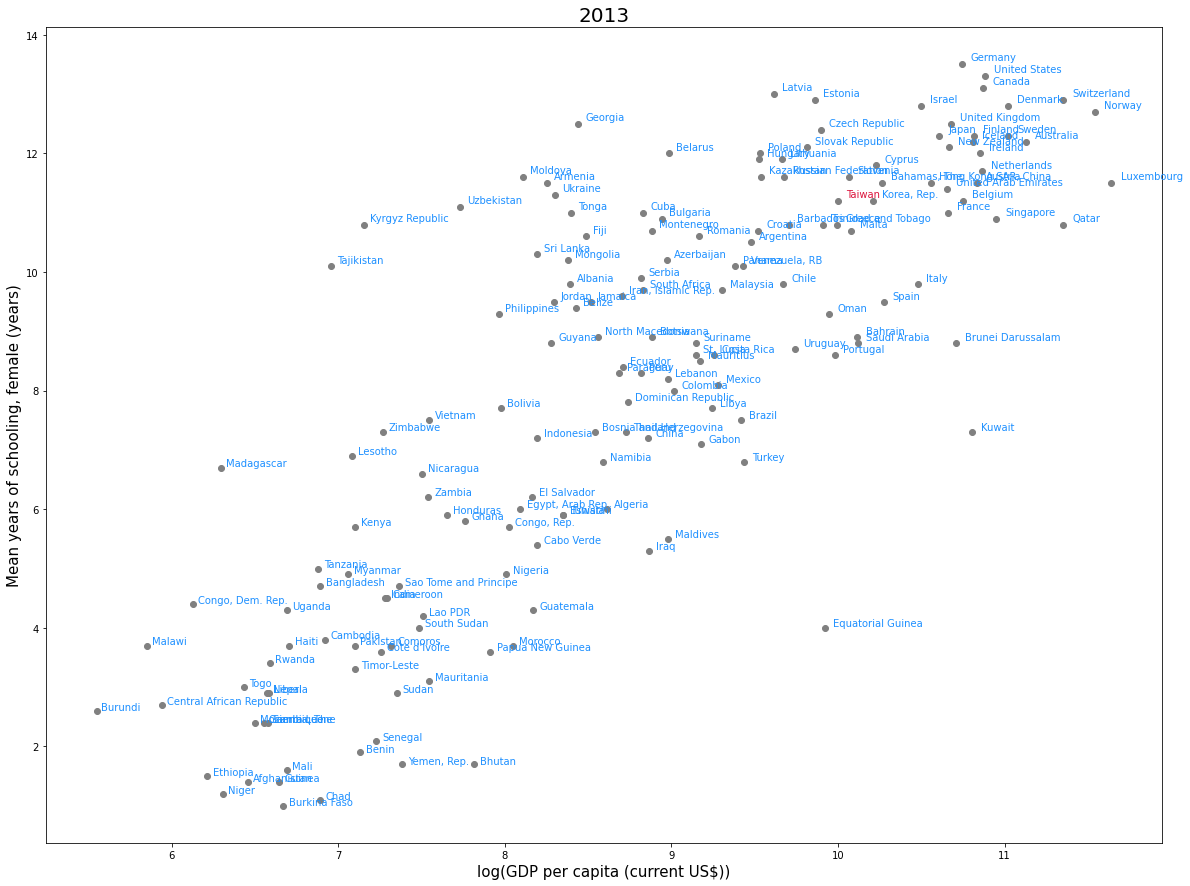

In [30]:
# Visualization of GDP per capita (current US$) and Fertility rate, total (births per woman).
plt.figure(figsize = (20, 15))

plt.scatter(X, y, color="gray")
plt.title("2013", fontsize=20)
plt.xlabel("log(GDP per capita (current US$))", fontsize=15)
plt.ylabel("Mean years of schooling, female (years)", fontsize=15)

# Add country name tag.
for i, label in enumerate(annotations):
    if country_name[i] == "Taiwan":
        plt.annotate(label, (X[i], y[i]), xytext=(1.005*X[i], 1.005*y[i]), color="crimson")
    else:
        plt.annotate(label, (X[i], y[i]), xytext=(1.005*X[i], 1.005*y[i]), color="dodgerblue")
plt.savefig('6.png', dpi=600)

# # Add country name tag.
# for i in range(length):
#     if country_name[i] == "Taiwan":
#         plt.text(X[i], y[i]*1.02, country_name[i], fontsize=10, color = "blue", style = "italic", weight = "light", verticalalignment='center', horizontalalignment='right',rotation=0)
#     else:
#         plt.text(X[i], y[i]*1.02, country_name[i], fontsize=10, color = "red", style = "italic", weight = "light", verticalalignment='center', horizontalalignment='right',rotation=0)

plt.show()

In [31]:
# Build rdinary least square method model.

In [32]:
df

,Country Name,"Fertility rate, total (births per woman) 2013","Mean years of schooling, female (years) 2013",GDP per capita (current US$) 2013,log(GDP)
0,Afghanistan,5.359,1.4,637.165523,6.457029
1,Albania,1.690,9.8,4413.060861,8.392324
2,Algeria,2.990,6.0,5499.581487,8.612427
3,Argentina,2.322,10.5,13080.254732,9.478859
4,Armenia,1.728,11.5,3838.185801,8.252755
...,...,...,...,...,...
163,Vietnam,1.978,7.5,1886.671896,7.542570
164,"Yemen, Rep.",4.326,1.7,1607.152365,7.382219
165,Zambia,5.132,6.2,1878.907001,7.538446
166,Zimbabwe,4.030,7.3,1430.000818,7.265430


In [33]:
data = np.array(df)

In [34]:
data

array([['Afghanistan', 5.359, 1.4, 637.165523187024, 6.45702946983482],
       ['Albania', 1.69, 9.8, 4413.06086120676, 8.392323800519737],
       ['Algeria', 2.99, 6.0, 5499.58148704572, 8.612427275060908],
       ['Argentina', 2.322, 10.5, 13080.2547323367, 9.478859099770844],
       ['Armenia', 1.728, 11.5, 3838.18580148382, 8.25275508641302],
       ['Australia', 1.855, 12.2, 68150.1070413215, 11.129468007795808],
       ['Austria', 1.44, 11.5, 50716.7087062864, 10.834010695567995],
       ['Azerbaijan', 1.98, 10.2, 7875.75695254288, 8.971544580032337],
       ['Bahamas, The', 1.81, 11.5, 28768.0298936727, 10.267019976400142],
       ['Bahrain', 2.098, 8.9, 24744.296958551, 10.116350315527574],
       ['Bangladesh', 2.188, 4.7, 981.839879150399, 6.889428239204424],
       ['Barbados', 1.63, 10.8, 16451.1635759912, 9.708151487794789],
       ['Belarus', 1.668, 12.0, 7978.87261471076, 8.984552404111376],
       ['Belgium', 1.76, 11.2, 46744.6625441516, 10.752455358020347],
       ['B

In [35]:
data = data[:,2:4]
data

array([[1.4, 637.165523187024],
       [9.8, 4413.06086120676],
       [6.0, 5499.58148704572],
       [10.5, 13080.2547323367],
       [11.5, 3838.18580148382],
       [12.2, 68150.1070413215],
       [11.5, 50716.7087062864],
       [10.2, 7875.75695254288],
       [11.5, 28768.0298936727],
       [8.9, 24744.296958551],
       [4.7, 981.839879150399],
       [10.8, 16451.1635759912],
       [12.0, 7978.87261471076],
       [11.2, 46744.6625441516],
       [9.4, 4568.50295763852],
       [1.9, 1251.21051783537],
       [1.7, 2472.71430857435],
       [7.7, 2908.20008548078],
       [7.3, 5131.39450642932],
       [8.9, 7224.96517150786],
       [7.5, 12300.3248822758],
       [8.8, 44740.085018517],
       [10.9, 7651.8178806676],
       [1.0, 787.47017629755],
       [2.6, 256.976002796754],
       [5.4, 3615.97904131099],
       [3.8, 1013.4204006154],
       [4.5, 1465.63884316769],
       [13.1, 52652.5936828278],
       [2.7, 380.298167643018],
       [1.1, 979.812409638156],
  

In [36]:
data = np.array(data, dtype=float)  # Convert the type of data into float.
data

array([[1.40000000e+00, 6.37165523e+02],
       [9.80000000e+00, 4.41306086e+03],
       [6.00000000e+00, 5.49958149e+03],
       [1.05000000e+01, 1.30802547e+04],
       [1.15000000e+01, 3.83818580e+03],
       [1.22000000e+01, 6.81501070e+04],
       [1.15000000e+01, 5.07167087e+04],
       [1.02000000e+01, 7.87575695e+03],
       [1.15000000e+01, 2.87680299e+04],
       [8.90000000e+00, 2.47442970e+04],
       [4.70000000e+00, 9.81839879e+02],
       [1.08000000e+01, 1.64511636e+04],
       [1.20000000e+01, 7.97887261e+03],
       [1.12000000e+01, 4.67446625e+04],
       [9.40000000e+00, 4.56850296e+03],
       [1.90000000e+00, 1.25121052e+03],
       [1.70000000e+00, 2.47271431e+03],
       [7.70000000e+00, 2.90820009e+03],
       [7.30000000e+00, 5.13139451e+03],
       [8.90000000e+00, 7.22496517e+03],
       [7.50000000e+00, 1.23003249e+04],
       [8.80000000e+00, 4.47400850e+04],
       [1.09000000e+01, 7.65181788e+03],
       [1.00000000e+00, 7.87470176e+02],
       [2.600000

In [37]:
data = sm.add_constant(data, prepend = True)   # Add constant.
data

array([[1.00000000e+00, 1.40000000e+00, 6.37165523e+02],
       [1.00000000e+00, 9.80000000e+00, 4.41306086e+03],
       [1.00000000e+00, 6.00000000e+00, 5.49958149e+03],
       [1.00000000e+00, 1.05000000e+01, 1.30802547e+04],
       [1.00000000e+00, 1.15000000e+01, 3.83818580e+03],
       [1.00000000e+00, 1.22000000e+01, 6.81501070e+04],
       [1.00000000e+00, 1.15000000e+01, 5.07167087e+04],
       [1.00000000e+00, 1.02000000e+01, 7.87575695e+03],
       [1.00000000e+00, 1.15000000e+01, 2.87680299e+04],
       [1.00000000e+00, 8.90000000e+00, 2.47442970e+04],
       [1.00000000e+00, 4.70000000e+00, 9.81839879e+02],
       [1.00000000e+00, 1.08000000e+01, 1.64511636e+04],
       [1.00000000e+00, 1.20000000e+01, 7.97887261e+03],
       [1.00000000e+00, 1.12000000e+01, 4.67446625e+04],
       [1.00000000e+00, 9.40000000e+00, 4.56850296e+03],
       [1.00000000e+00, 1.90000000e+00, 1.25121052e+03],
       [1.00000000e+00, 1.70000000e+00, 2.47271431e+03],
       [1.00000000e+00, 7.70000

In [38]:
y = np.array(y)  # Fertility rate, total (births per woman) 2013
y

array([ 1.4,  9.8,  6. , 10.5, 11.5, 12.2, 11.5, 10.2, 11.5,  8.9,  4.7,
       10.8, 12. , 11.2,  9.4,  1.9,  1.7,  7.7,  7.3,  8.9,  7.5,  8.8,
       10.9,  1. ,  2.6,  5.4,  3.8,  4.5, 13.1,  2.7,  1.1,  9.8,  7.2,
        8. ,  3.7,  4.4,  5.7,  8.6,  3.6, 10.7, 11. , 11.8, 12.4, 12.8,
        7.8,  8.4,  6. ,  6.2,  4. , 12.9,  5.9,  1.5, 10.6, 12.3, 11. ,
        7.1,  2.4, 12.5, 13.5,  5.8, 10.8,  4.3,  1.4,  8.8,  3.7,  5.9,
       11.5, 11.9, 12.2,  4.5,  7.2,  9.6,  5.3, 12. , 12.8,  9.8,  9.5,
       12.3,  9.5, 11.6,  5.7, 11.2,  7.3, 10.8,  4.2, 13. ,  8.2,  6.9,
        2.9,  7.7, 11.9, 11.5,  6.7,  3.7,  9.7,  5.5,  1.6, 10.7,  3.1,
        8.5,  8.1, 11.6, 10.2, 10.7,  3.7,  2.4,  4.9,  6.8,  2.9, 11.7,
       12.1,  6.6,  1.2,  4.9,  8.9, 12.7,  9.3,  3.7, 10.1,  3.6,  8.3,
        8.3,  9.3, 12. ,  8.6, 10.8, 10.6, 11.6,  3.4,  4.7,  8.8,  2.1,
        9.9,  2.4, 10.9, 12.1, 11.6,  9.7,  4. ,  9.5, 10.3,  8.6,  2.9,
        8.8, 12.3, 12.9, 10.1,  5. ,  7.3,  3.3,  3

In [39]:
print(len(X))
print(len(data))
print(len(y))

168
168
168


In [40]:
# Ordinary least square method.
mod = sm.OLS(y, data)
result = mod.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.309e+26
Date:                Sat, 26 Jun 2021   Prob (F-statistic):               0.00
Time:                        11:46:39   Log-Likelihood:                 4231.9
No. Observations:                 168   AIC:                            -8458.
Df Residuals:                     165   BIC:                            -8449.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.659e-12   5.65e-13     -4.706      0.0

In [41]:
# Replace GDP Per Capita with log(GDP Per Capita)

In [42]:
data

array([[1.00000000e+00, 1.40000000e+00, 6.37165523e+02],
       [1.00000000e+00, 9.80000000e+00, 4.41306086e+03],
       [1.00000000e+00, 6.00000000e+00, 5.49958149e+03],
       [1.00000000e+00, 1.05000000e+01, 1.30802547e+04],
       [1.00000000e+00, 1.15000000e+01, 3.83818580e+03],
       [1.00000000e+00, 1.22000000e+01, 6.81501070e+04],
       [1.00000000e+00, 1.15000000e+01, 5.07167087e+04],
       [1.00000000e+00, 1.02000000e+01, 7.87575695e+03],
       [1.00000000e+00, 1.15000000e+01, 2.87680299e+04],
       [1.00000000e+00, 8.90000000e+00, 2.47442970e+04],
       [1.00000000e+00, 4.70000000e+00, 9.81839879e+02],
       [1.00000000e+00, 1.08000000e+01, 1.64511636e+04],
       [1.00000000e+00, 1.20000000e+01, 7.97887261e+03],
       [1.00000000e+00, 1.12000000e+01, 4.67446625e+04],
       [1.00000000e+00, 9.40000000e+00, 4.56850296e+03],
       [1.00000000e+00, 1.90000000e+00, 1.25121052e+03],
       [1.00000000e+00, 1.70000000e+00, 2.47271431e+03],
       [1.00000000e+00, 7.70000

In [43]:
data[:,2] = np.log(data[:,2])

In [44]:
data

array([[ 1.        ,  1.4       ,  6.45702947],
       [ 1.        ,  9.8       ,  8.3923238 ],
       [ 1.        ,  6.        ,  8.61242728],
       [ 1.        , 10.5       ,  9.4788591 ],
       [ 1.        , 11.5       ,  8.25275509],
       [ 1.        , 12.2       , 11.12946801],
       [ 1.        , 11.5       , 10.8340107 ],
       [ 1.        , 10.2       ,  8.97154458],
       [ 1.        , 11.5       , 10.26701998],
       [ 1.        ,  8.9       , 10.11635032],
       [ 1.        ,  4.7       ,  6.88942824],
       [ 1.        , 10.8       ,  9.70815149],
       [ 1.        , 12.        ,  8.9845524 ],
       [ 1.        , 11.2       , 10.75245536],
       [ 1.        ,  9.4       ,  8.42694085],
       [ 1.        ,  1.9       ,  7.13186678],
       [ 1.        ,  1.7       ,  7.81307174],
       [ 1.        ,  7.7       ,  7.97528964],
       [ 1.        ,  7.3       ,  8.54313273],
       [ 1.        ,  8.9       ,  8.88529769],
       [ 1.        ,  7.5       ,  9.417

In [45]:
# Ordinary least square method.
mod = sm.OLS(y, data)
result = mod.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.194e+32
Date:                Sat, 26 Jun 2021   Prob (F-statistic):               0.00
Time:                        11:46:39   Log-Likelihood:                 5384.7
No. Observations:                 168   AIC:                        -1.076e+04
Df Residuals:                     165   BIC:                        -1.075e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.995e-15    1.7e-15     -3.526      0.0

In [46]:
# Visualization of ordinary least square method.

In [47]:
X = df["Mean years of schooling, female (years) 2013"]
y = df["Fertility rate, total (births per woman) 2013"]

In [48]:
mod = sm.OLS(y, X)
result = mod.fit()
print(result.summary())

                                              OLS Regression Results                                              
Dep. Variable:     Fertility rate, total (births per woman) 2013   R-squared (uncentered):                   0.455
Model:                                                       OLS   Adj. R-squared (uncentered):              0.451
Method:                                            Least Squares   F-statistic:                              139.2
Date:                                           Sat, 26 Jun 2021   Prob (F-statistic):                    9.50e-24
Time:                                                   11:46:39   Log-Likelihood:                         -378.94
No. Observations:                                            168   AIC:                                      759.9
Df Residuals:                                                167   BIC:                                      763.0
Df Model:                                                      1                

In [49]:
y_fitted = result.fittedvalues
y_fitted

0      0.337932
1      2.365523
2      1.448279
3      2.534488
4      2.775868
         ...   
163    1.810349
164    0.410346
165    1.496555
166    1.762073
167    2.703454
Length: 168, dtype: float64

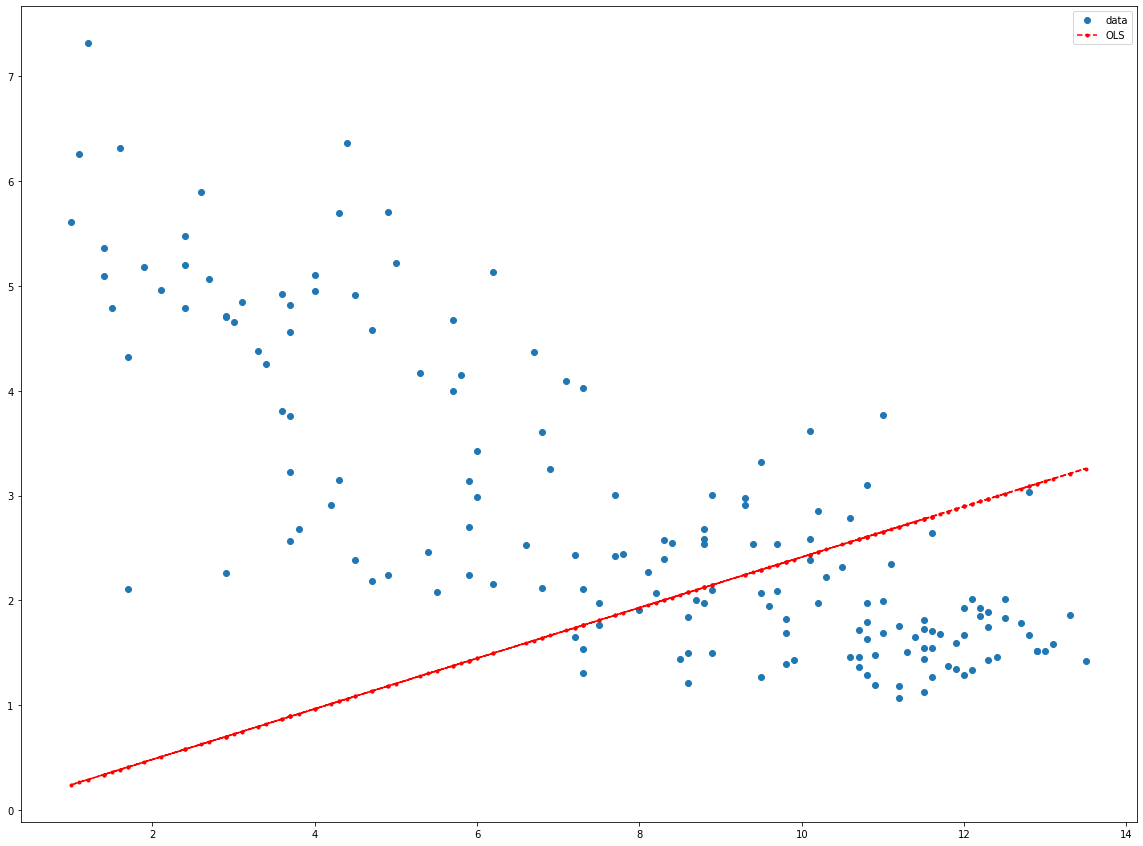

In [50]:
fig, ax = plt.subplots(figsize=(20,15))
ax.plot(X, y, 'o', label='data')
ax.plot(X, y_fitted, 'r--.',label='OLS')
ax.legend(loc='best')

In [51]:
fig.savefig('8.jpg', dpi=600)

In [52]:
# Machine learning.

In [53]:
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer='sgd', loss='mean_squared_error')

In [54]:
xs = df['Mean years of schooling, female (years) 2013']
ys = df['GDP per capita (current US$) 2013']

In [55]:
xs

0       1.4
1       9.8
2       6.0
3      10.5
4      11.5
       ... 
163     7.5
164     1.7
165     6.2
166     7.3
167    11.2
Name: Mean years of schooling, female (years) 2013, Length: 168, dtype: float64

In [56]:
ys

0        637.165523
1       4413.060861
2       5499.581487
3      13080.254732
4       3838.185801
           ...     
163     1886.671896
164     1607.152365
165     1878.907001
166     1430.000818
167    21973.000000
Name: GDP per capita (current US$) 2013, Length: 168, dtype: float64

In [57]:
model.fit(xs, ys, epochs=500)

Epoch 1/500
6/6 [==============================] - 0s 997us/step - loss: 396143355.4286
Epoch 2/500
6/6 [==============================] - 0s 997us/step - loss: 945912630.8571
Epoch 3/500
6/6 [==============================] - 0s 998us/step - loss: 277567636.5714
Epoch 4/500
6/6 [==============================] - 0s 997us/step - loss: 430775611.4286
Epoch 5/500
6/6 [==============================] - 0s 798us/step - loss: 345227565.7143
Epoch 6/500
6/6 [==============================] - 0s 997us/step - loss: 849216356.5714
Epoch 7/500
6/6 [==============================] - 0s 798us/step - loss: 322723734.8571
Epoch 8/500
6/6 [==============================] - 0s 997us/step - loss: 462719291.4286
Epoch 9/500
6/6 [==============================] - 0s 997us/step - loss: 432628315.4286
Epoch 10/500
6/6 [==============================] - 0s 798us/step - loss: 374406541.7143
Epoch 11/500
6/6 [==============================] - 0s 997us/step - loss: 533980013.7143
Epoch 12/500
6/6 [============

6/6 [==============================] - 0s 798us/step - loss: 317535524.5714
Epoch 94/500
6/6 [==============================] - 0s 798us/step - loss: 326873833.1429
Epoch 95/500
6/6 [==============================] - 0s 598us/step - loss: 397708155.4286
Epoch 96/500
6/6 [==============================] - 0s 798us/step - loss: 313556498.2857
Epoch 97/500
6/6 [==============================] - 0s 997us/step - loss: 334574781.7143
Epoch 98/500
6/6 [==============================] - 0s 798us/step - loss: 469547076.5714
Epoch 99/500
6/6 [==============================] - 0s 798us/step - loss: 286971035.4286
Epoch 100/500
6/6 [==============================] - 0s 798us/step - loss: 342006084.5714
Epoch 101/500
6/6 [==============================] - 0s 1ms/step - loss: 238901427.4286
Epoch 102/500
6/6 [==============================] - 0s 798us/step - loss: 795377682.2857
Epoch 103/500
6/6 [==============================] - 0s 1ms/step - loss: 303582884.5714
Epoch 104/500
6/6 [===============

6/6 [==============================] - 0s 798us/step - loss: 332819067.4286
Epoch 185/500
6/6 [==============================] - 0s 997us/step - loss: 358837330.2857
Epoch 186/500
6/6 [==============================] - 0s 798us/step - loss: 249574171.4286
Epoch 187/500
6/6 [==============================] - 0s 998us/step - loss: 402853558.8571
Epoch 188/500
6/6 [==============================] - 0s 797us/step - loss: 322577654.8571
Epoch 189/500
6/6 [==============================] - 0s 798us/step - loss: 646235099.4286
Epoch 190/500
6/6 [==============================] - 0s 998us/step - loss: 309520114.2857
Epoch 191/500
6/6 [==============================] - 0s 997us/step - loss: 289339965.7143
Epoch 192/500
6/6 [==============================] - 0s 798us/step - loss: 1025558802.2857
Epoch 193/500
6/6 [==============================] - 0s 997us/step - loss: 279240203.4286
Epoch 194/500
6/6 [==============================] - 0s 998us/step - loss: 294198665.1429
Epoch 195/500
6/6 [====

6/6 [==============================] - 0s 798us/step - loss: 304480848.0000
Epoch 275/500
6/6 [==============================] - 0s 798us/step - loss: 324081339.4286
Epoch 276/500
6/6 [==============================] - 0s 798us/step - loss: 316797769.1429
Epoch 277/500
6/6 [==============================] - 0s 798us/step - loss: 485858619.4286
Epoch 278/500
6/6 [==============================] - 0s 797us/step - loss: 512613033.1429
Epoch 279/500
6/6 [==============================] - 0s 997us/step - loss: 311460960.0000
Epoch 280/500
6/6 [==============================] - 0s 798us/step - loss: 315853865.1429
Epoch 281/500
6/6 [==============================] - 0s 798us/step - loss: 463337398.8571
Epoch 282/500
6/6 [==============================] - 0s 798us/step - loss: 413147218.2857
Epoch 283/500
6/6 [==============================] - 0s 797us/step - loss: 371216470.8571
Epoch 284/500
6/6 [==============================] - 0s 798us/step - loss: 402827360.0000
Epoch 285/500
6/6 [=====

6/6 [==============================] - 0s 798us/step - loss: 370627661.7143
Epoch 365/500
6/6 [==============================] - 0s 798us/step - loss: 429965846.8571
Epoch 366/500
6/6 [==============================] - 0s 798us/step - loss: 351403117.7143
Epoch 367/500
6/6 [==============================] - 0s 798us/step - loss: 343174290.2857
Epoch 368/500
6/6 [==============================] - 0s 796us/step - loss: 310995561.1429
Epoch 369/500
6/6 [==============================] - 0s 997us/step - loss: 265255227.4286
Epoch 370/500
6/6 [==============================] - 0s 598us/step - loss: 805312859.4286
Epoch 371/500
6/6 [==============================] - 0s 798us/step - loss: 947518418.2857
Epoch 372/500
6/6 [==============================] - 0s 798us/step - loss: 271665830.8571
Epoch 373/500
6/6 [==============================] - 0s 599us/step - loss: 318637257.1429
Epoch 374/500
6/6 [==============================] - 0s 997us/step - loss: 330599744.0000
Epoch 375/500
6/6 [=====

6/6 [==============================] - 0s 997us/step - loss: 254613714.2857
Epoch 455/500
6/6 [==============================] - 0s 798us/step - loss: 312722208.0000
Epoch 456/500
6/6 [==============================] - 0s 997us/step - loss: 513745156.5714
Epoch 457/500
6/6 [==============================] - 0s 996us/step - loss: 407762678.8571
Epoch 458/500
6/6 [==============================] - 0s 997us/step - loss: 784348864.0000
Epoch 459/500
6/6 [==============================] - 0s 997us/step - loss: 246781874.2857
Epoch 460/500
6/6 [==============================] - 0s 997us/step - loss: 834348141.7143
Epoch 461/500
6/6 [==============================] - 0s 798us/step - loss: 298514896.0000
Epoch 462/500
6/6 [==============================] - 0s 798us/step - loss: 370035723.4286
Epoch 463/500
6/6 [==============================] - 0s 1ms/step - loss: 278621373.7143
Epoch 464/500
6/6 [==============================] - 0s 800us/step - loss: 397619250.2857
Epoch 465/500
6/6 [=======

In [58]:
print(model.predict([10.0]))

[[21176.047]]
